In [ ]:
pip install face-recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=946ceb2db3faa4ceffb4a0ce2c6a4719231e928e748550b8dd797b340fd6d82b
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


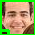

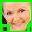

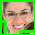

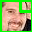

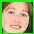

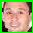

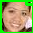

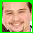

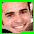

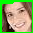

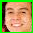

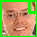

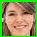

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load some pre-trained data on face frontal from opencv (haar cascade algorithm)
trained_face_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Choose an image to detect faces in
img = cv2.imread('/content/drive/MyDrive/Group.jpeg')

# Must convert to greyscale
grayscaled_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect Faces
face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)

img_crop = []

# Draw rectangles around the faces
for (x, y, w, h) in face_coordinates:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img_crop.append(img[y:y + h, x:x + w])

for counter, cropped in enumerate(img_crop):
    cv2_imshow(cropped)
    cv2.imwrite("pose_result_{}.png".format(counter), cropped)
    cv2.waitKey(0)

In [ ]:
import numpy as np
import cv2
import face_recognition
import os
from datetime import datetime

Path='/content/drive/MyDrive/ImagesAttendance'
images=[]
classNames=[]
myList=os.listdir(Path)
print(myList)
for cl in myList:
  curImg=cv2.imread(f'{Path}/{cl}')
  images.append(curImg)
  classNames.append(os.path.splitext(cl)[0]) #remove extension
print(classNames)

#number of images(Encoding images)
def findEncodings(images):
  encodeList=[]
  for img in images:
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    encode=face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList

def markAttendance(name):
  with open('Attendance.csv','r+') as f:
   myDataList = f.readlines()
   nameList = []
   for line in myDataList:
     entry = line.split(',')
     nameList.append(entry[0])
   if name not in nameList:
       now = datetime.now()
       dtString = now.strftime('%H:%M:%S')
       f.writelines(f'\n{name},{dtString}')




encodeListKnown=findEncodings(images)
print('Encoding completed')

cap=cv2.VideoCapture(0)
while True:
  success, img=cap.read()
  imgS=cv2.resize(img,(0,0),None,fx=0.25,fy=0.25)
  # As it is real-time,reducing size of image gives effecient results
  imgS=cv2.cvtColor(imgS,cv2.COLOR_BGR2RGB)
'''img=cv2.imread('/content/drive/MyDrive/ImagesAttendance')
 print(img)
 try:
    imgS= cv2.resize(img, (1400, 1000), interpolation=cv2.INTER_AREA)
    print(imgS.shape)
 except:
    break
height, width , layers = imgS.shape
size=(width,height)
print(size)'''

facesCurFrame=face_recognition.face_locations(imgS)
encodesCurFrame=face_recognition.face_encodings(imgS,facesCurFrame)

for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
    matches=face_recognition.compare_faces(encodeListKnown,encodeFace)
    faceDis=face_recognition.face_distance(encodeListKnown,encodeFace)
    print(faceDis)

    matchIndex=np.argmin(faceDis)
    if matches[matchIndex]:
      name=classNames[matchIndex].upper()
      print(name)
      y1,x2,y2,x1=faceLoc
      y1,x2,y2,x1=y1*4,x2*4,y2*4,x1*4
      cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
      cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
      cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSEY_COMPLEX,1,(255,255,255),2)
      markAttendance(name)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(1)

